
# Regresja liniowa 

W tym materiale zaprezentuje Państwu jak możemy przeprowadzić uczenie za pomocą prostej regresji liniowej
Rozpocznijmy od wczytania klasycznego (prostego) zbioru danych Diabetes (cukrzyków)


In [ ]:
from sklearn import datasets

dataset3 = datasets.load_diabetes()
print(dataset3)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  


# Preprocessing


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

size = len(dataset3.data)

data3 = np.concatenate([dataset3.data, np.reshape(dataset3.target, (size,1))], axis = 1)
column_names = dataset3.feature_names[:]
column_names.append('target')
df3 = pd.DataFrame(data3, columns = column_names, copy = True)
df3.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [ ]:
X = df3.drop('target', axis = 1)
y = df3['target']
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641



Obejrzyjmy jak np wygląda wykres naszej cechy w zależnosci od BMI


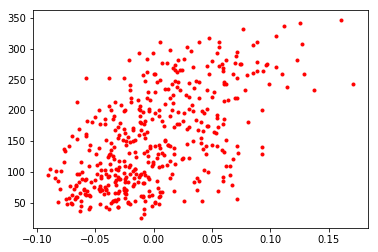

In [ ]:
%matplotlib inline 
plt.plot(X['bmi'], y, 'r.')
plt.show()

## Podział na dane treningowe i testowe

Przeprowadźmy prosty podział naszego zbioru na testowy i treningowy

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X, y)


# Jednowymiarowa regresja liniowa


In [ ]:
X1_train = X_train['bmi'].values.reshape(-1,1)
X1_test = X_test['bmi'].values.reshape(-1,1)
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X1_train, y_train)
y_pred = regressor.predict(X1_test)

Pozostaje nam sprawdzić skuteczność działania tego klasyfikatorów. W tym przypadku skupimy się na wykresie

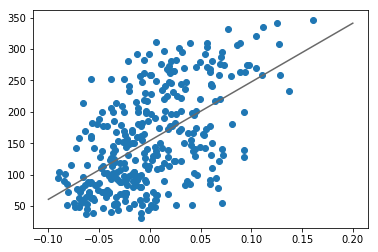

In [ ]:
%matplotlib inline
xpred = np.linspace(-0.1, 0.2)
Xpred = xpred[:, np.newaxis]
ypred = regressor.predict(Xpred)
plt.scatter(X1_train, y_train)
plt.plot(Xpred, ypred, color="dimgrey")


# Wielowymiarowa regresja liniowa


In [ ]:

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

Pozostaje nam sprawdzić skuteczność działania tego klasyfikatora.  Tu już mamy kłopot z generowaniem wykresu.
Pozostają nam jednak inne miary dla naszych danych.

## Wyjaśniona wariancja


In [ ]:

from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.5060372683746543


## MSE (Mean Squared Error) Błąd średniokwadratowy


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2548.226669068051


## MAE (Mean Absolute Error)


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

40.80453030308091


## $R^2$


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4983211359895283


## Stochastyczna regresja liniowa


In [ ]:

from sklearn.linear_model import SGDRegressor

regressor = SGDRegressor(loss='squared_loss')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/home/dyschemist/Workspace/virt-env/WAD/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Pozostaje nam sprawdzić skuteczność działania tego klasyfikatora. 

## Wyjaśniona wariancja


In [ ]:

from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.022233668223908043


## MSE (Mean Squared Error) Błąd średniokwadratowy


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

4986.354555384215


## MAE (Mean Absolute Error)


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

61.777630132780665


## $R^2$


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.01831782891846434